# Práctica I: Python

## Práctica 1: Python para la ciencia de datos – Análisis del fichero mundo

El objetivo de esta práctica es utilizar los conocimientos adquiridos en la asignatura para realizar un análisis de distintas características de la población mundial basándonos en el fichero mundo.csv. La práctica se realizará en grupos de 2 personas y corresponde a un 50% de la nota de la asignatura. La fecha límite de entrega será el 23/11/2019 a las 23:59. Se permite la entrega hasta una semana después (30/11/2019), pero las prácticas que se entreguen en fechas posteriores al 23/11 tendrán como máximo una puntuación de 8 puntos. La entrega consistirá en un notebook de Python en el que se incluyan las respuestas a las preguntas planteadas, así como el código desarrollado para responderlas.

El fichero consta de una tabla con 26 columnas y 110 filas que contienen datos referentes a varias características de la población mundial. Se pide al alumno que, una vez leídos los datos, realice las siguientes operaciones con ellos:

1. Uno de los primeros pasos para realizar un buen análisis de datos es familiarizarnos con los datos que contiene el fichero a analizar. Para ello, calcularemos los estadísticos descriptivos elementales de las variables del fichero. Una vez cargados los datos en nuestro programa Python (utilizando la librería Pandas), calcula los siguientes valores para cada una de las variables:

    - Número de muestras (valores distintos de missing)
    - Media y desviación estándar
    - Valor mínimo y valor máximo

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


##COSAS QUE ESTÁN BIEN:
###APARTADOS 1, 3, 5 Y 6
###APARTADOS 2 Y 4: DUDAS CORREO 7,8: COMENTAR RESULTADOS 9: COGER DOS VARIABLES Y VER COSITAS.

In [2]:
#Importamos el dataframe y vemos un pequeño resumen enseñando los primeros 5 valores por arriba.
df = pd.read_csv('/home/anabanana/Documents/T1/Programacion/PracticaPython/mundo.csv')
print(df.head())

columns = df.columns
rows, colums_count = df.shape
for column in columns:
    if column == 'pa_s' or column == 'relig': #filtramos columnas con valores numericos, aunque algo se puede hacer con la religion
        continue
    else:
        num_null = df[str(column)].isnull().sum()
        not_null = rows -  num_null
        mean_value=df[str(column)].mean().round(3)
        #para calcular std, reemplazamos los valores NaN por la media
        #df[str(column)]=df[str(column)].fillna(mean_value) -> sustituimos NaN con la media
        std = df[str(column)].std().round(3)
        min_value = min(df[str(column)].dropna()) #quitamos NaN para calcular valores mínimos y máximos
        max_value = max(df[str(column)].dropna())
        #min_value = min(df[str(column)])
        #max_value = max(df[str(column)])
        print('Para la columna ' +  '\033[1m' + str(column) +  '\033[0m' + ' hay ' + '\033[1m' + str(not_null) +'\033[0m' +' valores distintos de missing/NaN, la media es de ' +  '\033[1m' + str(mean_value) +  '\033[0m' + ', la desviación estándar es '+  '\033[1m' + str(std) + '\033[0m'+ '.\nEl valor mínimo y máximo son: ('+ '\033[1m'+ str(round(min_value,3))+', '+str(round(max_value,3)) +  '\033[0m'+ '). \n')



           pa_s  poblac  densidad  urbana     relig  espvidaf  espvidam  \
0     Acerbaján    7400      86.0    54.0  Musulma.        75        67   
1    Afganistán   20500      25.0    18.0  Musulma.        44        45   
2      Alemania   81200     227.0    85.0  Protest.        79        73   
3  Arabia Saudí   18000       7.7    77.0  Musulma.        70        66   
4     Argentina   33900      12.0    86.0  Católica        75        68   

   alfabet  inc_pob  mortinf  ...   tasasida   log_pib  logtsida   nac_def  \
0     98.0     1.40     35.0  ...        NaN  3.477121       NaN  3.285714   
1     29.0     2.80    168.0  ...   0.000000  2.311754  0.000000  2.409091   
2     99.0     0.36      6.5  ...  13.767241  4.244005  1.689544  1.000000   
3     62.0     3.20     52.0  ...   0.338889  3.822887  0.805400  6.333333   
4     95.0     1.30     25.6  ...  11.516224  3.532500  1.630279  2.222222   

   fertilid   log_pob  alfabmas  alfabfem  clima  region2  
0      2.80  3.86923

2. Hay datos que nos interesa analizar basándonos en agrupaciones, para darle un sentido a nuestro análisis en base a esa agrupación. Basándonos en las siguientes agrupaciones:
       - Por región (columna región)
       - Por religión
   Calcula los siguientes estadísticos:
       - Número de observaciones
       - Número de valores ausentes (missing)
       - Mediana
       - Media
       - Varianza
       - Valores máximo y mínimo 
   Para las siguientes variables:
       - Incremento de la población
       - Esperanza de vida
       - Tasa de alfabetización (tanto masculina como femenina)
       - La mortalidad infantil
       - PIB per cápita
   ¿Qué conclusiones podemos sacar de estos cálculos? Comenta los resultados.


In [3]:
columns_to_study = ['inc_pob', 'espvidaf', 'espvidam', 'alfabmas', 'alfabfem', 'mortinf','pib_cap']
group_by = ['regi_n', 'relig']
for value in group_by:
    for column in columns_to_study:
        
        df_result = pd.DataFrame(columns = ['total_observ', 'valores_ausentes', 'mediana', 'media', 'varianza', 'min', 'max']) 
        
        group = df.groupby(str(value))[str(column)]
        df_result['valores_ausentes'] = df.groupby(str(value))[str(column)].apply(lambda x: x.isnull().sum()).reset_index(name='valores_ausentes')['valores_ausentes']
        df_result['total_observ'] = df.groupby(str(value))[str(column)].size().reset_index(name='total_observ')['total_observ']
        df_result['mediana'] = df.groupby(str(value))[str(column)].median(skipna=True).reset_index(name='mediana')
        df_result['media'] = df.groupby(str(value))[str(column)].mean().reset_index(name='media')
        # standard deviation 
        # default ddof = 0 -> COMPROBAR DEFINICION APUNTES Y CAMBIARLO IF NECESSARY
        # divded by n 
        df_result['varianza'] = df.groupby(str(value))[str(column)].var(ddof=0).reset_index(name='varianza')
        df_result['min'] = df.groupby(str(value))[str(column)].min().reset_index(name='min')
        df_result['max'] = df.groupby(str(value))[str(column)].max().reset_index(name='max')
        
        #df_result = pd.DataFrame(columns = [str(value), 'total_observ', 'valores_ausentes', 'mediana', 'media', 'varianza', 'min', 'max']) 
        #df_result[str(value)] = df[str(value)]
        #df_result['total_observ'] = total_obs
        print(df_result.head)
        
       
        
        
        

<bound method NDFrame.head of    total_observ  valores_ausentes  mediana  media  varianza  min  max
0            21                 0      1.0    1.0       1.0  1.0  1.0
1            14                 0      2.0    2.0       2.0  2.0  2.0
2            17                 0      3.0    3.0       3.0  3.0  3.0
3            19                 0      4.0    4.0       4.0  4.0  4.0
4            17                 0      5.0    5.0       5.0  5.0  5.0
5            21                 0      6.0    6.0       6.0  6.0  6.0>
<bound method NDFrame.head of    total_observ  valores_ausentes  mediana  media  varianza  min  max
0            21                 0        1    1.0       1.0    1    1
1            14                 0        2    2.0       2.0    2    2
2            17                 0        3    3.0       3.0    3    3
3            19                 0        4    4.0       4.0    4    4
4            17                 0        5    5.0       5.0    5    5
5            21              

3. Selecciona los países cuya tasa de mortalidad sea superior a la media. Comenta los resultados obtenidos.

In [4]:
#Calculamos la media
mean_tasa_mortalidad = df['tasa_mor'].mean()
#Filtramos los valores en el dataset -> nos quedamos con las filas cuyo valor de la tasa de mortalidad sea mayor que la media
mort_great_tasa = df[df['tasa_mor']>mean_tasa_mortalidad]
#Imprimimos en una lista los países que han cumplido la condición
print(mort_great_tasa['pa_s'].tolist())

['Afganistán', 'Alemania', 'Austria', 'Bangladesh', 'Bélgica', 'Bielorusia', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Camboya', 'Camerún', 'Croacia', 'Dinamarca', 'Estonia', 'Etiopía', 'Finlandia', 'Gabón', 'Gambia', 'Gran Bretaña', 'Grecia', 'Haití', 'Hungía', 'India', 'Italia', 'Kenia', 'Letonia', 'Liberia', 'Lituania', 'Nigeria', 'Noruega', 'Pakistán', 'Polonia', 'Portugal', 'Rep. C. Africana', 'Rep. Checa', 'Ruanda', 'Rumanía', 'Rusia', 'Senegal', 'Somalia', 'Suecia', 'Tanzania', 'Ucrania', 'Uganda', 'Uruguay', 'Zambia']


4. Obtén la tasa media de natalidad y mortalidad por clima. Ordena los países en base a esas tasas medias (de mayor a menor). ¿En qué climas se produce mayor natalidad? ¿En qué región se obtiene mayor mortalidad?

In [4]:
#df_result['media'] = df.groupby(str(value))[str(column)].mean().reset_index(name='media')
tasa_nat = df.groupby('clima')['tasa_nat'].mean().reset_index(name='tasa_nat')
tasa_mort = df.groupby('clima')['tasa_mor'].mean().reset_index(name='tasa_mor')

natalidad_mortandad = {'clima': tasa_nat['clima'],'tasa_nat':tasa_nat['tasa_nat'],'tasa_mor':tasa_mort['tasa_mor']}
f = pd.DataFrame(natalidad_mortandad)
print(f.to_string(index = False))


 clima   tasa_nat   tasa_mor
   1.0  38.428571   7.000000
   2.0  34.600000   6.000000
   3.0  29.000000   8.833333
   4.0  36.800000   9.200000
   5.0  31.843750  10.387500
   6.0  25.800000   9.150000
   7.0  13.750000  11.000000
   8.0  17.676471  10.008529
   9.0  13.500000  10.000000


5. Obtén el crecimiento económico de cada país basándote en el PIB y ordénalos de menor a mayor crecimiento económico. Realiza el mismo cálculo basándote ahora en el PIB per cápita.

NOTA: La variable PIB no está incluida en el fichero por lo que corresponde al alumno realizar su cálculo (basándonos en la población y el PIB per cápita, este cálculo es automático).

In [5]:
pib_cap = df['pib_cap']
poblac = df['poblac']

#creamos una lista vacia y añadimos los valores calculados del PIB
pib=[]
for i in range(0, len(poblac)):
    pib.append(pib_cap[i]*poblac[i])

#creamos el dataset con las columnas que nos interesan
pib_paises = {'pais': df['pa_s'],'poblac':df['poblac'], 'pib_cap':df['pib_cap'], 'PIB': pib}
pib_paises = pd.DataFrame(pib_paises)

#hacemos un sort(ordenar) en función del valor del PIB
pib_paises_sort_PIB = pib_paises.sort_values(by="PIB")
print(pib_paises_sort_PIB.to_string(index = False))

print('------------------------------------------------------------------')
#ordenamos en función del pib per cápita
pib_paises_sort_PIB_pc= pib_paises.sort_values(by="pib_cap")
print(pib_paises_sort_PIB_pc.to_string(index = False))

             pais   poblac  pib_cap         PIB
           Gambia      959      351      336609
          Liberia     2900      409     1186100
          Burundi     6000      208     1248000
 Rep. C. Africana     3300      457     1508100
         Barbados      256     6950     1779200
        Nicaragua     4100      447     1832700
           Ruanda     8400      292     2452800
            Haití     6500      383     2489500
          Camboya    10000      260     2600000
     Burkina Faso    10000      357     3570000
         Botswana     1359     2677     3638043
       Afganistán    20500      205     4202500
         Islandia      263    17241     4534383
         Jordania     3961     1157     4582877
          Bahrein      600     7875     4725000
           Líbano     3620     1429     5172980
           Zambia     9100      573     5214300
            Gabón     1300     4283     5567900
          Bolivia     7900      730     5767000
         Honduras     5600     1030     

6. Representa  la  información  obtenida  en  el  ejercicio  5  mediante  un  diagrama  de barras, pero sólo con los 20 países con el PIB más alto.

(array([1., 0., 0., 2., 1., 2., 0., 2., 1., 0., 0., 1., 1., 0., 1., 2., 1.,
        2., 0., 3.]),
 array([ 336609.  ,  608178.55,  879748.1 , 1151317.65, 1422887.2 ,
        1694456.75, 1966026.3 , 2237595.85, 2509165.4 , 2780734.95,
        3052304.5 , 3323874.05, 3595443.6 , 3867013.15, 4138582.7 ,
        4410152.25, 4681721.8 , 4953291.35, 5224860.9 , 5496430.45,
        5768000.  ]),
 <a list of 20 Patch objects>)

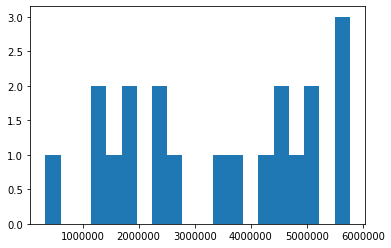

In [6]:
pib_paises_sort_PIB = pib_paises.sort_values(by="PIB")[0:20]
plt.hist(x=pib_paises_sort_PIB['PIB'], bins=20)


(0.0, 3)

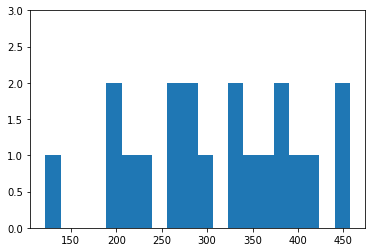

In [7]:
pib_paises_sort_PIB_pc = pib_paises.sort_values(by="pib_cap")[0:20]
plt.hist(x=pib_paises_sort_PIB_pc['pib_cap'], bins=20)
plt.ylim(ymax=3)

7. Representa mediante un swarmplot la tasa de natalidad por región y añade como tercera variable categórica el clima. ¿Tiene sentido el gráfico obtenido en relación a los datos? Comenta el resultado.

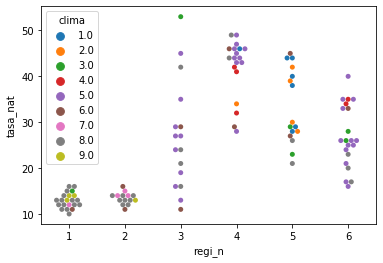

In [10]:
ax = sns.swarmplot(y=df['tasa_nat'], x=df['regi_n'], hue=df['clima'])

8. Representa  mediante  un boxplot la  tasa  de  natalidad  por  clima.  Comenta  los resultados.

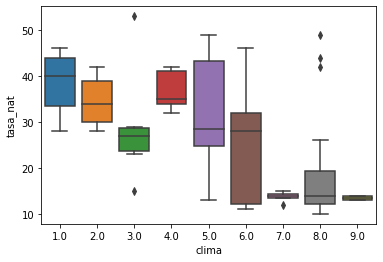

In [13]:
ax = sns.boxplot(x=df['clima'], y=df['tasa_nat'])